In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('liver.csv')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
df['Age'].shape

(583,)

In [6]:
df['Dataset'].shape

(583,)

In [7]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [8]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [9]:
x=list(df.columns)

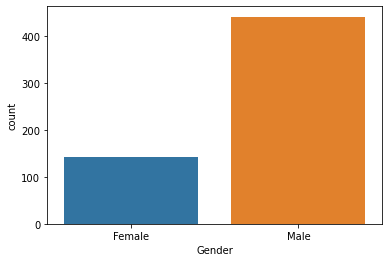

In [10]:
sns.countplot(df['Gender'])

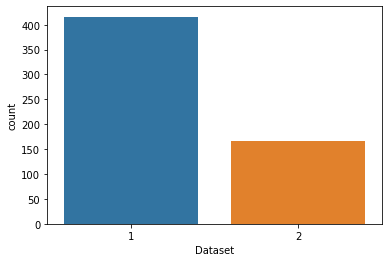

In [11]:
sns.countplot(df['Dataset'])

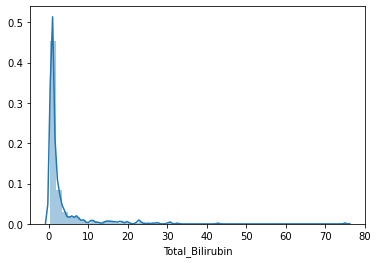

In [12]:
sns.distplot(df['Total_Bilirubin'])

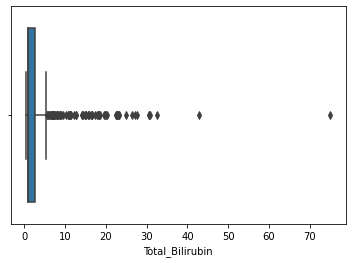

In [13]:
sns.boxplot(df['Total_Bilirubin'])

In [14]:
df['Total_Bilirubin']=1/(df['Total_Bilirubin'])

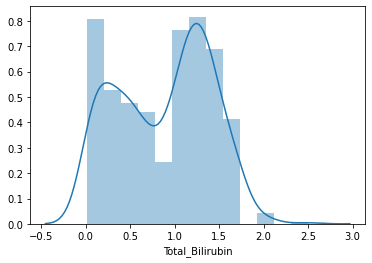

In [15]:
sns.distplot(df['Total_Bilirubin'])

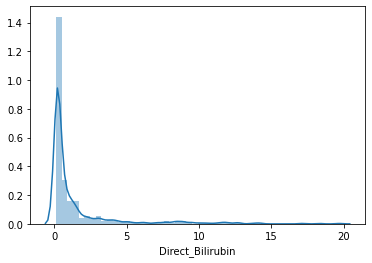

In [16]:
sns.distplot(df['Direct_Bilirubin'])

((array([-3.03864458, -2.76067196, -2.6046564 , -2.49417498, -2.40769892,
         -2.3361812 , -2.27492907, -2.22118298, -2.17317757, -2.12971269,
         -2.08993403, -2.05321107, -2.01906469, -1.98712197, -1.95708677,
         -1.92871983, -1.90182499, -1.87623933, -1.85182603, -1.828469  ,
         -1.80606889, -1.78453998, -1.76380776, -1.74380708, -1.72448059,
         -1.70577754, -1.68765283, -1.67006615, -1.65298134, -1.63636583,
         -1.62019017, -1.60442766, -1.58905399, -1.57404698, -1.55938631,
         -1.54505335, -1.53103095, -1.51730328, -1.50385574, -1.49067478,
         -1.47774783, -1.46506322, -1.45261004, -1.44037815, -1.42835805,
         -1.41654085, -1.40491822, -1.39348234, -1.38222584, -1.37114181,
         -1.36022372, -1.34946541, -1.33886106, -1.32840516, -1.31809251,
         -1.30791817, -1.29787745, -1.28796589, -1.27817928, -1.26851357,
         -1.25896495, -1.24952976, -1.2402045 , -1.23098587, -1.22187068,
         -1.2128559 , -1.20393862, -1.

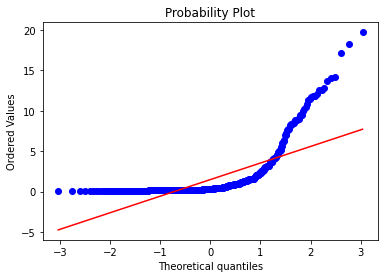

In [17]:
from scipy import stats
stats.probplot(df['Direct_Bilirubin'],plot=plt)

In [18]:
df['Age'].shape

(583,)

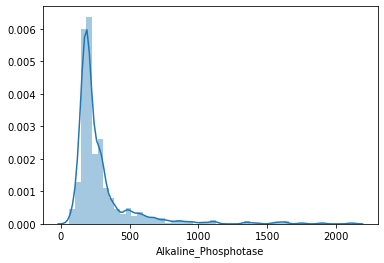

In [19]:
sns.distplot(df['Alkaline_Phosphotase'])

In [20]:
df['Alkaline_Phosphotase']=np.log(df['Alkaline_Phosphotase'])

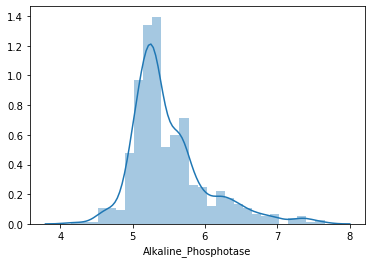

In [21]:
sns.distplot(df['Alkaline_Phosphotase'])

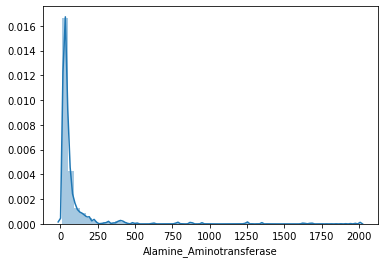

In [22]:
sns.distplot(df['Alamine_Aminotransferase'])

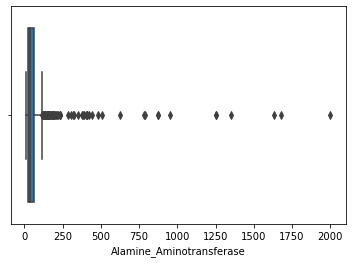

In [23]:
sns.boxplot(df['Alamine_Aminotransferase'])

In [24]:
df['Alamine_Aminotransferase']=1/(df['Alamine_Aminotransferase'])

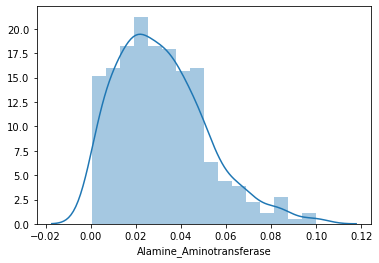

In [25]:
sns.distplot(df['Alamine_Aminotransferase'])

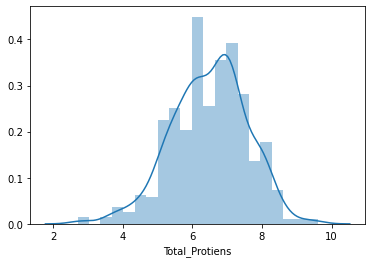

In [26]:
sns.distplot(df['Total_Protiens'])

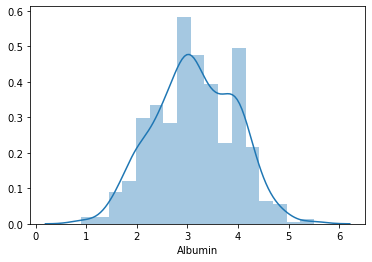

In [27]:
sns.distplot(df['Albumin'])

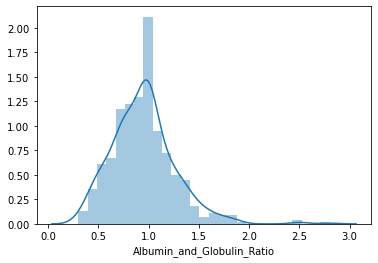

In [28]:
sns.distplot(df['Albumin_and_Globulin_Ratio'])

In [29]:
df.shape

(583, 11)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()

In [32]:
df['Gender']=le.fit_transform(df['Gender'])

In [33]:
df['Gender'].value_counts()


1    441
0    142
Name: Gender, dtype: int64

In [34]:
from sklearn.model_selection import StratifiedKFold

In [35]:
sc=StandardScaler()

In [36]:
#df=df.drop(['Alamine_Aminotransferase'])

In [37]:
Y=df['Dataset']

In [38]:
#X=df.drop(['Dataset'],axis=1,inplace=True)

In [39]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [40]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()
x, y = oversample.fit_resample(df.drop(['Dataset'], axis=1), df['Dataset'])
#x, y =(df.drop(['Dataset'], axis=1), df['Dataset'])
new_df = pd.DataFrame(x, columns=df.drop(['Dataset'], axis=1).columns)
new_df['Dataset'] = y

new_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,1.428571,0.1,5.231109,0.062500,18,6.8,3.3,0.90,1
1,62,1,0.091743,5.5,6.549651,0.015625,100,7.5,3.2,0.74,1
2,62,1,0.136986,4.1,6.194405,0.016667,68,7.0,3.3,0.89,1
3,58,1,1.000000,0.4,5.204007,0.071429,20,6.8,3.4,1.00,1
4,72,1,0.256410,2.0,5.273000,0.037037,59,7.3,2.4,0.40,1


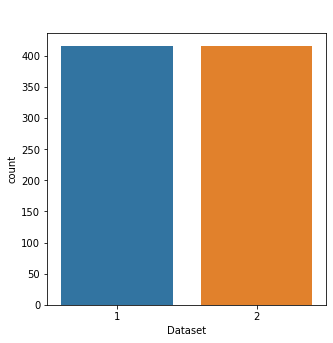

In [41]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Dataset', data=new_df)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [42]:
new_df.shape

(832, 11)

In [43]:
for i in new_df.select_dtypes(include=['object']).columns:
    new_df[i] = new_df[i].astype(str).astype(float)

In [44]:
X = new_df.drop(['Dataset'], axis=1)
y = new_df['Dataset']

In [45]:
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.291726,-1.694039,0.907238,-0.432149,-0.412836,1.431871,-0.290691,0.268713,0.108746,-0.246126
1,1.110472,0.590305,-1.745121,1.801326,2.284775,-0.921140,0.044798,0.921605,-0.016395,-0.754341
2,1.110472,0.590305,-1.655356,1.222277,1.557977,-0.868851,-0.086125,0.455254,0.108746,-0.277890
3,0.868800,0.590305,0.056923,-0.308067,-0.468284,1.880064,-0.282509,0.268713,0.233886,0.071508
4,1.714652,0.590305,-1.418410,0.353703,-0.327131,0.153693,-0.122947,0.735065,-1.017517,-1.834298


In [46]:
#X=X.drop(new_df['Alamine_Aminotransferase'],axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [48]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model= KNN()   
model.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [50]:
y_pred=model.predict(X_test)

In [51]:
acc=accuracy_score(y_test,y_pred)

In [52]:
acc

0.7261904761904762

In [53]:
from sklearn.ensemble import VotingClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression()
knc = KNeighborsClassifier(n_neighbors = 25)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(criterion='entropy', max_depth=7, max_features=10,min_samples_split=5)
svc = SVC()
xgb = XGBClassifier()
abc = AdaBoostClassifier()

In [56]:
models = [lr, knc, dtc, rfc, svc, xgb, abc]
models_name = ['Logistic Regression', "K Neighbor Classifier", "Decision Tree Classifier", 'Random Forest Classifier','Support Vector Classifier', 'XGBoost Classifier','ADABoost Classifier']

In [57]:
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 1000)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
estimator.append(('rfc',rfc))
estimator.append(('KNN',knc))
estimator.append(('adaboost',abc))
  
# Voting Classifier with hard voting
vote= VotingClassifier(estimators = estimator,weights = [1,1],voting='soft')

In [58]:
for clf in(lr,svc,dtc,rfc,knc,abc):
    clf.fit(X_train,y_train)
    ypred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,ypred))

LogisticRegression 0.6428571428571429
SVC 0.6547619047619048
DecisionTreeClassifier 0.8452380952380952
RandomForestClassifier 0.75
KNeighborsClassifier 0.6666666666666666
AdaBoostClassifier 0.6547619047619048


In [59]:
dtc.n_features_

C:\Users\kanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


10

In [60]:
ma=[4,5,6,7,8,9]
mi=[1,2,3,4,5]
max_features=[6,7,8,9,10,25,40,50,60,70,80]
cri=['Auto','gini','entropy']

In [61]:
para={'max_depth':ma,'min_samples_split':mi,'max_features':max_features,'criterion':cri}

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
rf=RandomizedSearchCV(estimator=dtc,param_distributions=para,n_iter=15,cv=5,n_jobs=-1)

In [64]:
rf.fit(X_train,y_train)

C:\Users\kanch\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kanch\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kanch\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\kanch\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0,

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'criterion': ['Auto', 'gini',
                                                      'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8, 9],
                                        'max_features': [6, 7, 8, 9, 10, 25, 40,
                                                         50, 60, 70, 80],
                                        'min_samples_split': [1, 2, 3, 4, 5]})

In [65]:
rf.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features=10, min_samples_split=4)

In [76]:
dt=DecisionTreeClassifier()

In [77]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
ypred=dt.predict(X_test)

In [79]:
acc=accuracy_score(y_test,ypred)

In [80]:
acc

0.8452380952380952

In [81]:
cm=confusion_matrix(y_test,ypred)

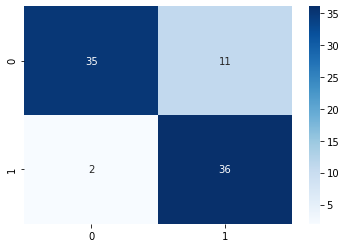

In [82]:
sns.heatmap(cm,annot=True,cmap='Blues')

In [83]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           1       0.95      0.76      0.84        46
           2       0.77      0.95      0.85        38

    accuracy                           0.85        84
   macro avg       0.86      0.85      0.85        84
weighted avg       0.86      0.85      0.85        84



In [84]:
import pickle

In [85]:
file=open('liver.pkl','wb')
pickle.dump(dt,file)

In [ ]:
65	Female	0.7	0.1	187	16	18	6.8	3.3	0.90	